# Chapter 9: Files and Exceptions

### 9.2 Files
- Python views a text file as a sequence of characters and a binary file as a sequence of bytes
- As in lists, the first character in a text file and byte in a binary file is located at position 0
- The highest position number is n-1
- For each file you open, Python creates a file object that you'll use to interact with the file


Every operating system provides a mechanism to denote the end of a file
- Some represent it with an end-of-file marker
- Others might maintain a count of the total characters/bytes in the file

**Standard file objects**
<br> When a Python program begins execution, it creates three standard file objects:
- sys.stdin - the standard input file object
- sys.stdout - the standard output file object
- sys.stderr - the standard error file object
- The input function implicitly uses sys.stdin to get user input from the keybord
- Function print implicitly outputs to stdout, which appears in the command line
- Python implicitly outputs program errors and tracebacks to sys.stderr, which also appears in the command line
- You must import the sys module if you need to refer to these objects explicitly in your code


### 9.3 Text-file Processing

In [1]:
with open('accounts.txt', mode='w') as accounts: # Write mode
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')
    
# You can also write to a file with print which automatically outputs a \n
# print('100 Jones 24.98', file=accounts)

**Python's with statement**
- acquires a resource and assigns its corresponding object to a variable
- allows the application to use the resource via that variable
- calls the resource object's close method to release the resource when program control reaches the end of the with statement's suite

**Built-in function open**
- The open function opens the file and associates it with a file object
- The mode argument specifies the file-open mode 
- The mode 'w' opens the file for writing, creating the file if it doesn not exist
- If you do not specify a path to the file, Python creates it in the current folder
- **Be careful:** Opening a file for writing deletes all the existing data in the file

**Writing to the file**
- The with statement assigns the object returned by open to the variable (accounts) in the as clause

### 9.3.1 Self Check

In [2]:
with open('grades.txt', mode='w') as grades:
    grades.write('1 Red A\n')
    grades.write('2 Green B\n')
    grades.write('3 White A\n')

### 9.3.2 Reading Data from a Text File
- If the contents of a file should not be modified, open the file for reading only - 'r'

In [3]:
# Read records from the file accounts.txt and display the contents of each record in columns
# The Account and Name columns are left aligned
# Balance column is right aligned

with open('accounts.txt', mode='r') as account: # Read mode
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in account:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


**File method readlines**
- The readlines method also can be used to read an entire text file
- The method returns each line as a string in a list of strings
- Use only for small files

**Seeking to a specific file position**
- The system maintains a file-position pointer representing the location of the next character to read
- To reposition the file-position pointer to the beginning of the file, use file_object.seek(0)

### 9.3.2 Self Check

In [4]:
with open('grades.txt', mode='r') as grades:
    print(f'{"ID":<10}{"Name":<10}{"Grade":>10}')
    for record in grades:
        id_1, name, grade = record.split()
        print(f'{id_1:<10}{name:<10}{grade:>10}')

ID        Name           Grade
1         Red                A
2         Green              B
3         White              A


### 9.4 Updating Text Files
- Formatted data written to a text file cannot be modified without the risk of destroying other data
- How to replace \[300 White 0.00]?
- Copy the records before \[300 White 0.00]
- Write the updated and correctly formatted record for account 300 to this file
- Copy the records after \[300 White 0.00] to the temporary file
- Delete the old file and
- Rename the temporary file to use the original file's name

**Updating accounts.txt**

In [5]:
accounts = open('accounts.txt', 'r')

# Create new temporary file
temp_file = open('temp_file.txt', 'w')

with accounts, temp_file:
    # Copy  the records before and after White
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        # Write the updated and correctly formatted record for 300
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')
                 

**os module file-processing functions**
- The os module provides functions for interacting with the operating system, including several that manipulate your system's files and directories
- The remove function is used to delete the original file
- The rename function renames a file

In [6]:
import os
os.remove('accounts.txt')

In [7]:
os.rename('temp_file.txt', 'accounts.txt')

### 9.4 Self Check

In [8]:
accounts = open('accounts.txt', 'r')
temp_file = open('temp_file.txt', 'w')

with accounts, temp_file:
    for records in accounts:
        account, name, balance = records.split()
        if name != 'Doe':
            temp_file.write(records)
        else:
            new_record = ' '.join([account, 'Smith', balance])
            temp_file.write(new_record + '\n')
    

In [9]:
import os
os.remove('accounts.txt')
os.rename('temp_file.txt', 'accounts.txt')

### 9.5 Serialization with JSON
- JSON (JavaScript Object Notation) is a text-based, human-and-computer-readable, data-interchange format used to represent object as collections of name-value pairs
- JSON can even represent objects of custom classes
- JSON has become the preferred data format for transmitting objects across platforms (especially cloud-based web services)


**JSON Data Format**
- JSON objects are similar to Python dictionaries
- Each JSON object contains a comma-separated list of property names and values, in curly braces
- JSON also supports array (comma-separated values in square brackets


Values in JSON objects and arrays can be:
- strings in double quotes
- numbers
- JSON Boolean values
- null
- arrays
- other JSON objects

**Python standard library module json**
- The json module enables you to convert objects to JSON text format. (This is known as serializing the data.)


In [10]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [11]:
# Serialize the object to JSON

import json

with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts) # Serialize the dict into the file accounts

**Deserializing the JSON Text**
- The json's module load function reads the entire JSON contents of its file object argument and converts the JSON into a Python object

In [12]:
# Load the object
with open('accounts.json', 'r') as accounts:
    accounts.json = json.load(accounts)

In [13]:
# Interact with the loaded object

accounts.json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [14]:
accounts.json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [15]:
accounts.json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [16]:
accounts.json['accounts'][1]

{'account': 200, 'name': 'Doe', 'balance': 345.67}

**Displaying the JSON text**
- The json module's dump function returns a Python string representation of an object in JSON format
- Using dumps with load, you can read the JSON from the file and display it in a nicely indented format
- When the dumps function call includes the indent keyword argument, the string contains newline characters and indentation for pretty printing

In [17]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


### 9.5 Self Check

In [18]:
import json

grades_dict = {'gradebook': [
    {'student_id': 1, 'name': 'Red', 'grade': 'A'},
    {'student_id': 2, 'name': 'Green', 'grade': 'B'},
    {'student_id': 3, 'name': 'White', 'grade': 'A'}]}

with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)

In [19]:
with open('grades.json', 'r') as grades:
    print(json.dumps(json.load(grades), indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


### 9.6 Focus on Security: pickle Serialization and Deserialization


The pickly module can serialize objects into a Python-specific data format.

**Caution:**
- Pickle files can be hacked. Do not trust a raw pickle file you recieve over the network
- Pickle is a protocol that is specific to Python and cannot be used to communicate with applications written in other languages. It is also insecure by default.
- We do not recommend using pickle

### 9.7 Additional Notes Regarding Files

**File-open modes:**
- 'r' : Open a text file for reading. This is the default if no mode is specified
- 'w' : Open a text file for writing. Existing file contents are deleted
- 'a' : Open a text file for appending at the end, creating the file if it does not exist. 
- 'r+' : Open a text file reading and writing
- 'w+' : Open a text file reading and writing. Existing file contents are deleted.
- 'a+' : Open a text file reading and appending at the end. New data is written at then end of the file. If the file does not exist, it is created.
- Each text-file mode has a corresponding binary-file mode specified with b ('rb'). You would use these modes if you were reading or writing binary files, such as images

**Other file object methods**
- Read: returns a string containing the number of characters/bytes specified by the method's integer argument
- Readline: returns one line of text as a string. This method returns an empty string when it encounters the end of the file
- Writelines: recieves a list of strings and writes its contents to a file

### 9.8 Handling Exceptions
- FileNotFoundError: occurs if you attempt to open non-existent file with the 'r' or 'r+' modes
- PermissionsError: occurs if you attempt an operation for which you do not have position
- ValueError ('I/O operation on closed file'): occurs when you attempt to write to a file that has already been closed

### 9.8.1 Division by Zero and Invalid Input

**Division by Zero**
- ZeroDivisionError


When an exception is raised in IPython:
- terminates the snippet
- displays the exception's traceback
- shows the next In [] prompt so you can input the next snippet


If an exeption occurs in a script, IPython terminates the script and displays the exception's traceback.

**Invalid Input**
- Raises a ValueError

### 9.8.2 try Statements

**try Clause**
- Python uses try statements to enable exception handling
- The try keyword is followed by a colon and a suite of statements that might raise exceptions

**except Clause**
- except clauses immediatley follow the try clause suite
- These are known as exception handlers
- Each except clause specifies the type of exception it handles

**else Clause**
- else clauses are optional and follow the last except clause
- The else clause specifies code that should execute only if the code in the try suite did not raise exceptions

In [20]:
while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError:
        print('You must enter two integers\n')
    except ZeroDivisionError:
        print('Attempted to divide by zero\n')
    else:
        print(f'{number1: .3f} / {number2:.3f} = {result:.3f}')
        break # terminate the loop
                      

Enter numerator:  3
Enter denominator:  4


 3.000 / 4.000 = 0.750


**Flow of control for a ZeroDivisionError**
- The point in the program at which an exception occurs is often referred to as the raise point
- If there are no except handlers, a process called stack unwinding occurs
- When an except clause successfully handles the exception, program execution resumes with finally clause (if there is one), then with the next statement after the try statement
- After the exception is handled, program control does not return to the raise point, but to after the try statement

### 9.8.2 Self Check

In [21]:
def try_int(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')

In [22]:
try_int(10.7)

int(10.7) is 10


In [23]:
try_int('hello')

hello could not be converted to an integer


### 9.8.3 Catching Multiple Exceptions in One except Clause
- If several except suites are identical, you can catch those exception types by specifying them as a tuple in a single except handler
- The as clause is optional
- Example: except(type1, type2, ...) as variable_name:

### 9.8.4 What Exceptions Does a Function or Method Raise?
- Before using any function or method, read its online API documentation, which specifies what exceptions are thrown by the function/method

### 9.8.5 What Code Should Be Placed in a Try Suite?
- Place in a try suite a significant logical section of a program in which several statements can raise exceptions. (Rather than using numerous try statements)
- However, for proper execution-handling granularity, each try statement should enclose a section of code small enough that, when an exception occurs, the specific context is known and the except handlers can process the exception properly.

### 9.9 finally Clause
- The finally clause is gauranteed to execute, regardless of whether its try suite executes successfully or an exception occurs
- This makes the finally suite an ideal location to place resource-deallocation code for resources acquired in the corresponding try wuite
- "clean up" code goes into the finall suite

In [24]:
try:
    print('try suite with no exceptions raised')

except:
    print('this will not execute')

else:
    print('else executes because no exceptions in the try suite')

finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [25]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


**Combining with statements and try... except statements**
- Robust processing code normally appears in a try suite containing a with statement to gaurantee that the resource gets released
- You do not need a finally clause, because the with statement handles resource deallocation

In [26]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


### 9.9 Self Check

In [27]:
def try_int(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
    finally:
        print('finally executed')

In [28]:
try_int(10.7)

int(10.7) is 10
finally executed


In [29]:
try_int('hello')

hello could not be converted to an integer
finally executed


### 9.10 Explicitly Raising an Exception
- The raise statment explicitly raises an exception
- The simplest form of the raise state is --- raise ExceptionClassName
- The raise statement creates an object of the specified exception class
- Code that raises an exception first should release any resources acquired before the exception occurred
- In most cases, when you need to raise an exception, it is recommend that you use one of Python's many built-in exception types
- [Built-in Exceptions Types](https://docs.python.org/3/library/exceptions.html)

### 9.11 Stack Unwinding and Tracebacks

In [30]:
def function1():
    function2()

def function2():
    raise Exception('An exception occurred')

In [31]:
function1()

Exception: An exception occurred

**Tips for reading tracebacks**
- Start from the end and read the error message first
- Then, read upward through the traceback, looking for the first line that indicates code you wrote in your program

**Exceptions in finally suites**
- If an exception occurs and is not processed by the time the finally suite executes, stack unwinding occurs
- If the finally suite raises a new exception that the suite does not catch, the first exception is lost, and the new exception is passed to the next enclosing try statement
- For this reason, a finally suite should always enclose in a try statement any code that may raise an exception, so that the exceptions will be processed within that suite

### 9.12 Intro to Data Science: Working with CSV Files

### 9.12.1 Python Standard Libarary Module csv
- The csv module provides functions for working with CSV files
- Many other libraries also have built-in CSV support

**Writing to a csv file**
- The csv module's writer function returns an object that writes CSV data to the specified file object
- Each call to the writer's writerow method receives an iterable to store in the file
- By default writerow delimits values with commas, but you can specify custom delimiters
- CSV files generally do not contain spaces after commas
- writerow can be replaced with writerows that outputs a comma-separated list of iterables representing records
- If you write data that contains commas within a given string, writerow encloses that string in double quotes

In [ ]:
import csv

# Create a csv file
with open('accounts.csv', 'w', newline='') as accounts:
    writer = csv.writer(accounts) 
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.66])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])
    

**Reading from a CSV file**
- The csv module's reader function returns an object that reads CSV-format data from the specified file object
- You can iterate through the reader object one record at a time

In [ ]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

**Caution: commas in csv data fields**
- Be careful when working with strings containing embedded commas
- Programs that read CSV files typically expect every record to have the same number of fields
- Embedded commas can make records have different numbers of fields

**Caution: missing commas and extra commas in csv files:**
- Ommitting or adding extra commas can cause records to have less or more fields than expected

### 9.12.1 Self Check

In [ ]:
with open('grades.csv', 'w', newline='') as grades:
    writer = csv.writer(grades)
    writer.writerow([1, 'Red', 'A'])
    writer.writerow([2, 'Green', 'B'])
    writer.writerow([3, 'White', 'A'])

In [ ]:
with open('grades.csv', 'r', newline='') as grades:
    print(f'{"ID":<5}{"Name":<5}{"Grade":>6}')
    reader = csv.reader(grades)
    for record in reader:
        id1, name, grade = record
        print(f'{id1:<5}{name:<5}{grade:>6}')

### 9.12.2 Reading CSV Files into Pandas DataFrames

**Datasets**
- Rdatasets repository provides links to over 1100 free datasets in CSV format
- Rdatasets available [here](https://github.com/vincentarelbundock/Rdatasets)
- Pydataset module specifically used for accessing Rdatasets [here](https://github.com/iamaziz/PyDataset)
- Another large source of datasets: [https://github.com/awesomedata/awesome-public-datasets](https://github.com/awesomedata/awesome-public-datasets)

**Working with locally stored csv files**
- You can load a csv dataset into a DataFrame with the pandas function read_csv

In [ ]:
import pandas as pd

df = pd.read_csv('accounts.csv', 
                 names=['account', 'name', 'balance'])

# The names keyword argument specifies the DataFrame's column names.
# If you do not supply this argument, read_csv assumes that the CSV file's first row is the column names.

df

**Save a DataFrame file using CSV format:**

In [ ]:
df.to_csv('accounts_from_dataframe.csv', index=False)
# index=False indicates that the row names are not written to the file

### 9.12.3 Reading the Titanic Disaster Dataset

In [59]:
import pandas as pd

pd.set_option('precision', 2)

titanic = pd.read_csv('titanic.csv')

print(titanic.head())

print(titanic.tail())

list(titanic.columns)


   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket    fare    cabin embarked boat   body  \
0  29.00    0.0    0.0   24160  211.34       B5        S    2    NaN   
1   0.92    1.0    2.0  113781  151.55  C22 C26        S   11    NaN   
2   2.00    1.0    2.0  113781  151.55  C22 C26        S  NaN    NaN   
3  30.00    1.0    2.0  113781  151.55  C22 C26        S  NaN  135.0   
4  25.00    1.0    2.0  113781  151.55  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal,

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [60]:
titanic.columns = ['class', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 
                   'cabin', 'embarked', 'boat', 'body', 'destination']

### 9.12.4 Simple Data Analysis with the Titanic Disaster Dataset

In [61]:
titanic.describe()

,class,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.27,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


In [62]:
(titanic.survived == 1).describe() 
# top is the most frequently occuring value in the result
# freq is the number of occurences of the top value

count      1310
unique        2
top       False
freq        810
Name: survived, dtype: object

### 9.12.5 Histogram - Abby Lloyd

In [58]:
%matplotlib inline
# Use this to imbed a PNG of the graphic in Jupyter Notebook
# Use %matplotlib to enable support in IPython

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'body'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

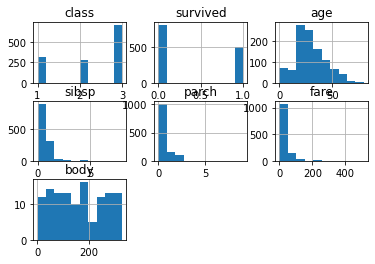

In [63]:
titanic.hist()

### 9.12.5 Passenger Age Histogram

In [66]:
import pandas

grades = pd.read_csv('grades.csv', names=['ID', 'Name', 'Grade'])
print(grades)

   ID   Name Grade
0   1    Red     A
1   2  Green     B
2   3  White     A
